 ## Implementação do terceiro algoritmo
 ### Diagnóstico diferencial
 #### Modelo Logístico Multinomial
 Variáveis qualitativas

In [20]:
import pandas as pd
import numpy as np

# Importa as bibliotecas Pandas e Numpy.

In [21]:
df = pd.read_csv('amostra_dd.csv')
df

# Exibe dataset atribuído a df.

,HUMOR,COGNICAO,COMPORTAMENTO,PERCEPCAO,FISIOLOGICO,RISCO,DURACAO,RESULTADO
0,inercia,acreditar que esta enlouquecendo,conduta embotada,distorcoes temporais,perda de controle dos movimentos,uso de drogas ilicitas,variavel,transtorno de despersonalizacao/desrealizacao
1,insensibilidade,acreditar que esta enlouquecendo,robotico,distorcoes auditivas,perda de controle dos movimentos,ataques de panico,variavel,transtorno de despersonalizacao/desrealizacao
2,medo de dano cerebral,dificuldade em descrever sintomas,conduta embotada,distorcoes visuais,anestesia fisica,depressao,variavel,transtorno de despersonalizacao/desrealizacao
3,sofrimento intenso,indecisao,retraimento social,nao especificado,fadiga persistente,herdabilidade,> 2 semanas,transtorno depressivo maior
4,desespero,cognicao erronea,autodestrutivo,intrusao sensorial,resposta de sobressalto exagerada,transtorno mental anterior,> 2 meses,transtorno de estresse pos-traumatico
...,...,...,...,...,...,...,...,...
995,sofrimento intenso,pensamentos recorrentes de morte,retraimento social,nao especificado,perturbacoes do sono,herdabilidade,> 2 semanas,transtorno depressivo maior
996,surtos de raiva,hipervigilancia,impulsivo,flashbacks,ataques de panico,evento traumatico,< 1 mes,transtorno de estresse agudo
997,vergonha,pesadelos,imprudente,despersonalizacao,sintomas pos-concussivos,transtorno mental anterior,< 1 mes,transtorno de estresse agudo
998,sofrimento prolongado,dificuldade de concentracao,evitativo,despersonalizacao,reatividade fisiologica,transtorno mental anterior,< 1 mes,transtorno de estresse agudo


In [22]:
df['RESULTADO'].value_counts().sort_index()

# Frequência de cada transtorno mental da coluna RESULTADO (classe).

transtorno de despersonalizacao/desrealizacao    248
transtorno de estresse agudo                     246
transtorno de estresse pos-traumatico            243
transtorno depressivo maior                      263
Name: RESULTADO, dtype: int64

### Target
<li>0 = Transtorno de Despersonalizacao/Desrealizacao</li>
<li>1 = Transtorno de Estresse Agudo</li>
<li>2 = Transtorno de Estresse Pós-Traumático</li>
<li>3 = Transtorno Depressivo Maior</li>

In [23]:
df.loc[df['RESULTADO']=='transtorno de despersonalizacao/desrealizacao', 'RESULTADO'] = 0
df.loc[df['RESULTADO']=='transtorno de estresse agudo', 'RESULTADO'] = 1
df.loc[df['RESULTADO']=='transtorno de estresse pos-traumatico', 'RESULTADO'] = 2
df.loc[df['RESULTADO']=='transtorno depressivo maior', 'RESULTADO'] = 3

# Substitui o nome de cada transtorno mental por um número.

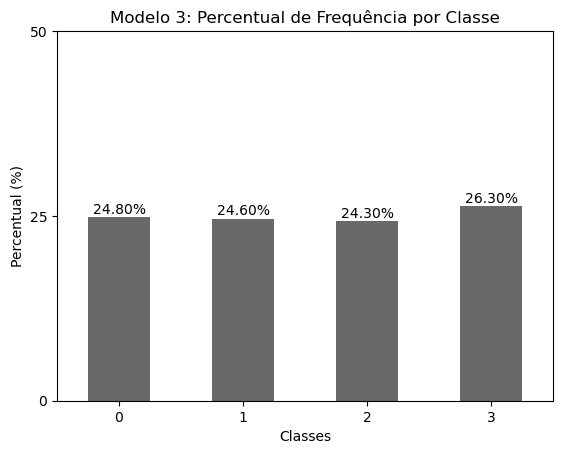

In [70]:
frequencia = df['RESULTADO'].value_counts().sort_index()
percentual = (frequencia / frequencia.sum()) * 100

percentual.plot(kind='bar', color='dimgrey')

plt.title('Modelo 3: Percentual de Frequência por Classe')
plt.xlabel('Classes')
plt.xticks(rotation=0)
plt.ylabel('Percentual (%)')
plt.ylim(0, 50)
plt.yticks(range(0, 51, 25))

for i, valor in enumerate(percentual):
    plt.text(i, valor + 0.5, f'{valor:.2f}%', ha='center')

plt.savefig('modelo3_frequencia.png')
plt.show()

# Cria, salva e exibe gráfico de barras com a percentagem referente à frequência de cada classe.

In [24]:
df.info()

# Mostra resumo dos dados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   HUMOR          1000 non-null   object
 1   COGNICAO       1000 non-null   object
 2   COMPORTAMENTO  1000 non-null   object
 3   PERCEPCAO      1000 non-null   object
 4   FISIOLOGICO    1000 non-null   object
 5   RISCO          1000 non-null   object
 6   DURACAO        1000 non-null   object
 7   RESULTADO      1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [28]:
df['RESULTADO'] = df['RESULTADO'].astype('int64')
print(df['RESULTADO'].dtype)

# Altera o tipo dos dados da coluna RESULTADO para números inteiros.

int64


In [29]:
dummies = pd.get_dummies(df,
                         columns=['HUMOR', 'COGNICAO', 'COMPORTAMENTO', 'PERCEPCAO', 'FISIOLOGICO', 'RISCO', 'DURACAO'],
                         dtype=int,
                         drop_first=True)
dummies

# Cria variáveis dummies (one-hot-encoding) utilizando a função get_dummies() do Pandas;
# As colunas passam a ser binárias e do tipo inteiros;
# 0 representa a ausência da característica diagnóstica;
# 1 representa a presença da característica diagnóstica;
# A primeira categoria de cada coluna é desconsiderada para evitar multicolinearidade.

,RESULTADO,HUMOR_anestesia emocional,HUMOR_angustia generalizada,HUMOR_apatia,HUMOR_autoaversao,HUMOR_culpa,HUMOR_culpa delirante,HUMOR_desesperanca,HUMOR_desespero,HUMOR_disforia,...,RISCO_herdabilidade,RISCO_neuroticismo,RISCO_perda significativa,RISCO_transtorno mental anterior,RISCO_transtornos subjacentes,RISCO_traumas interpessoais na infancia,RISCO_uso de drogas ilicitas,DURACAO_> 2 meses,DURACAO_> 2 semanas,DURACAO_variavel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,2,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [30]:
X = dummies.drop(['RESULTADO'], axis=1)
y = dummies['RESULTADO']

# Armazena em X todas as colunas do dataset, exceto RESULTADO;
# Armazena em y a coluna RESULTADO que será utilizada como rótulo.

In [31]:
X.columns

Index(['HUMOR_anestesia emocional', 'HUMOR_angustia generalizada',
       'HUMOR_apatia', 'HUMOR_autoaversao', 'HUMOR_culpa',
       'HUMOR_culpa delirante', 'HUMOR_desesperanca', 'HUMOR_desespero',
       'HUMOR_disforia', 'HUMOR_emocoes positivas ausentes',
       ...
       'RISCO_herdabilidade', 'RISCO_neuroticismo',
       'RISCO_perda significativa', 'RISCO_transtorno mental anterior',
       'RISCO_transtornos subjacentes',
       'RISCO_traumas interpessoais na infancia',
       'RISCO_uso de drogas ilicitas', 'DURACAO_> 2 meses',
       'DURACAO_> 2 semanas', 'DURACAO_variavel'],
      dtype='object', length=107)

In [32]:
y

0      0
1      0
2      0
3      3
4      2
      ..
995    3
996    1
997    1
998    1
999    0
Name: RESULTADO, Length: 1000, dtype: int64

In [33]:
X = X.astype('int64')
X.dtypes

# Altera o tipo dos dados armazenados em X para int64.

HUMOR_anestesia emocional                  int64
HUMOR_angustia generalizada                int64
HUMOR_apatia                               int64
HUMOR_autoaversao                          int64
HUMOR_culpa                                int64
                                           ...  
RISCO_traumas interpessoais na infancia    int64
RISCO_uso de drogas ilicitas               int64
DURACAO_> 2 meses                          int64
DURACAO_> 2 semanas                        int64
DURACAO_variavel                           int64
Length: 107, dtype: object

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importa a biblioteca que será utilizada para a criação e a avaliação do modelo.

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.cm as cm

# Importa bibliotecas que serão utilizadas na visualização dos dados.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Divide o dataset em conjuntos de treinamento (80%) e teste (20%), considerando a definição de X e y feita anteriormente.

In [37]:
modelo3 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

# Define o modelo de regressão logística.

In [38]:
modelo3.fit(X_train, y_train)

# Treina o modelo com os dados de treinamento.

LogisticRegression(max_iter=200, multi_class='multinomial')

In [39]:
y_pred = modelo3.predict(X_test)

# Faz previsões com os dados de teste e armazena o resultado (em uma array) na variável y_pred.

In [40]:
y_prob = modelo3.predict_proba(X_test)

# Probabilidades preditas.

In [41]:
y_prob

array([[0.00459046, 0.00956497, 0.98180069, 0.00404388],
       [0.00564522, 0.9799909 , 0.00981324, 0.00455064],
       [0.00402502, 0.00252141, 0.00166523, 0.99178834],
       [0.0051499 , 0.98273999, 0.00801408, 0.00409602],
       [0.98050206, 0.01169044, 0.00506514, 0.00274236],
       [0.00287289, 0.02372227, 0.97157486, 0.00182998],
       [0.00821299, 0.95223833, 0.03255787, 0.00699081],
       [0.00241112, 0.00148113, 0.99407776, 0.00202999],
       [0.98830631, 0.00436912, 0.0037057 , 0.00361887],
       [0.0048771 , 0.96768318, 0.02318648, 0.00425324],
       [0.00199781, 0.00490716, 0.00166405, 0.99143099],
       [0.00270079, 0.01033807, 0.9851962 , 0.00176494],
       [0.00657488, 0.96799506, 0.01980175, 0.00562831],
       [0.00212013, 0.00257053, 0.00182162, 0.99348772],
       [0.98691243, 0.00543843, 0.00439169, 0.00325744],
       [0.00252396, 0.00327585, 0.00186471, 0.99233548],
       [0.99028198, 0.0062105 , 0.00185395, 0.00165357],
       [0.00391965, 0.9782727 ,

In [42]:
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {acuracia}')

# Avalia e exibe a precisão do modelo treinado.

Acurácia do modelo: 1.0


In [43]:
mc = confusion_matrix(y_test, y_pred)
print('Matriz de confusão:')
print(mc)

# Cria e exibe uma matriz de confusão (avaliação do desempenho do modelo em relação a cada classe real e prevista).

Matriz de confusão:
[[41  0  0  0]
 [ 0 48  0  0]
 [ 0  0 52  0]
 [ 0  0  0 59]]


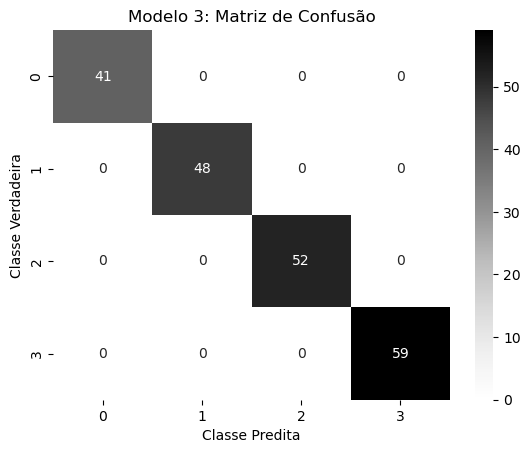

In [44]:
sns.heatmap(mc, annot=True, fmt='d', cmap='Greys')
plt.title('Modelo 3: Matriz de Confusão')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')
plt.savefig('modelo3_mc.png')
plt.show()

In [45]:
report = classification_report(y_test, y_pred)
print('Relatório de classificação:')
print(report)

# Cria e exibe um relatório de classificação com métricas de desempenho do modelo e de cada classe.

Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00        59

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [46]:
print(f'Intercepto do modelo: {modelo3.intercept_}')

Intercepto do modelo: [ 0.0105629   1.07962983 -0.70341149 -0.38678124]


In [47]:
print(f'Coeficientes do modelo: {modelo3.coef_}')

Coeficientes do modelo: [[ 0.36409571 -0.038221    0.24734915 -0.06154617 -0.14252388 -0.03441289
  -0.04068172 -0.03337494 -0.08049213 -0.18650513  0.38580216 -0.03776745
  -0.048666    0.29589246  0.26169322 -0.04610889 -0.14083745  0.23363892
  -0.04393824 -0.19374337 -0.09436094 -0.02701239 -0.04488339  0.12455466
  -0.13120677 -0.0991967  -0.12441428 -0.13924234 -0.20570269 -0.04881338
  -0.26360231  0.49367071 -0.04035259 -0.04196388 -0.19418785 -0.05027654
  -0.05647103 -0.04576735 -0.2089863  -0.04786847 -0.05066965 -0.05130106
  -0.25621178 -0.02932763  0.34229617 -0.04919505 -0.04984181 -0.22319691
   0.41348896 -0.06606795  0.75406147 -0.05406061 -0.12503101  0.65576793
  -0.27435036 -0.24805884 -0.19652856 -0.27480053 -0.06468893 -0.19316713
   0.77527767 -0.21499263 -0.12267125 -0.06800741 -0.08566139  0.26169322
   0.29589246  0.23363892  0.24734915 -0.46550993 -0.0630916  -0.09320801
  -0.58549446 -0.0740468  -0.04184153  0.49367071 -0.19652856 -0.05772542
  -0.0544588  

In [50]:
modelo3_ovr = LogisticRegression(multi_class='ovr')

# Altera o parâmetro multi_class para uso da estratégia One-vs-Rest ('ovr').

In [51]:
modelo3_ovr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [52]:
y_pred2 = modelo3_ovr.predict(X_test)

# Faz previsões com os dados de teste e armazena o resultado (em uma array) na variável y_pred.

In [55]:
acuracia2 = accuracy_score(y_test, y_pred2)
print(f'Acurácia do modelo: {acuracia2}')

# Avalia e exibe a precisão do modelo treinado.

Acurácia do modelo: 1.0


In [56]:
mc2 = confusion_matrix(y_test, y_pred2)
print('Matriz de confusão:')
print(mc2)

# Cria e exibe uma matriz de confusão (avaliação do desempenho do modelo em relação a cada classe real e prevista).

Matriz de confusão:
[[41  0  0  0]
 [ 0 48  0  0]
 [ 0  0 52  0]
 [ 0  0  0 59]]


In [57]:
report2 = classification_report(y_test, y_pred2)
print('Relatório de classificação:')
print(report2)

# Cria e exibe um relatório de classificação com métricas de desempenho do modelo e de cada classe.

Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00        59

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [58]:
print(f'Intercepto do modelo: {modelo3_ovr.intercept_}')

Intercepto do modelo: [-2.72202354 -1.2642503  -3.95780227 -3.29991446]


In [59]:
print(f'Coeficientes do modelo: {modelo3_ovr.coef_}')

Coeficientes do modelo: [[ 5.51230373e-01 -6.95661445e-02  3.99648284e-01 -1.09694188e-01
  -2.03193515e-01 -5.48859344e-02 -8.14782032e-02 -6.44519117e-02
  -1.38849980e-01 -2.43965197e-01  5.71012716e-01 -7.16313027e-02
  -7.93698439e-02  4.72394466e-01  4.21761227e-01 -5.91118058e-02
  -2.10140269e-01  3.78896566e-01 -8.08414841e-02 -2.41912830e-01
  -1.53973740e-01 -4.71371208e-02 -7.71246748e-02  2.46762489e-01
  -1.91671175e-01 -2.18879540e-01 -1.92458336e-01 -2.26669387e-01
  -3.05138287e-01 -8.33535162e-02 -3.64848659e-01  7.55771597e-01
  -7.09914345e-02 -8.29935473e-02 -3.07118863e-01 -8.92464693e-02
  -1.16525977e-01 -7.83762697e-02 -2.76905816e-01 -8.07091275e-02
  -9.08990364e-02 -9.30542826e-02 -3.82209287e-01 -5.39037496e-02
   5.19307615e-01 -8.56985503e-02 -9.04580227e-02 -3.23899338e-01
   6.50836443e-01 -1.30570747e-01  1.21223122e+00 -1.04217963e-01
  -2.24486372e-01  1.03999786e+00 -3.85611864e-01 -3.92259795e-01
  -3.54491437e-01 -3.91508300e-01 -1.17375462e-01 -3

In [61]:
y_prob2 = modelo3_ovr.predict_proba(X_test)
print(f'Probabilidades preditas: {y_prob2}')

Probabilidades preditas: [[0.00640364 0.01027569 0.97756056 0.0057601 ]
 [0.00790111 0.97254473 0.0133521  0.00620207]
 [0.00919613 0.00307638 0.00260383 0.98512365]
 [0.00837251 0.97361901 0.0116546  0.00635388]
 [0.96905386 0.02058182 0.00735196 0.00301236]
 [0.00348338 0.05108649 0.94351264 0.0019175 ]
 [0.00854379 0.93674464 0.04773722 0.00697435]
 [0.00674201 0.00184745 0.98588424 0.0055263 ]
 [0.98199327 0.00598477 0.00614237 0.00587959]
 [0.00586015 0.95025845 0.03876963 0.00511176]
 [0.00331824 0.00993558 0.00265277 0.98409341]
 [0.00485402 0.01829004 0.97410282 0.00275312]
 [0.00825    0.9550912  0.02984868 0.00681012]
 [0.00417675 0.00406993 0.00368651 0.98806681]
 [0.98003956 0.00789209 0.00735528 0.00471307]
 [0.00455742 0.00478866 0.00317265 0.98748127]
 [0.98086781 0.01342325 0.00307439 0.00263455]
 [0.00556615 0.96382403 0.02562903 0.00498079]
 [0.01067819 0.96422256 0.01820788 0.00689137]
 [0.00575687 0.96230765 0.02518999 0.00674549]
 [0.98491075 0.00670683 0.00365402 